<a href="https://colab.research.google.com/github/AkshitSingh11/Pair-Trading/blob/main/PAIR_TRADING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries

In [ ]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf
import seaborn as sn
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import adfuller
import numpy as np

#Generate data for tickers

In [ ]:
#Function to generate data
def get_historical_Data(tickers):
    data = pd.DataFrame()
    for ticker in tickers:
        df = yf.download(ticker, start=datetime(2019, 1, 1), end=datetime(2023, 12, 31))['Close']
        data[ticker] = df
    return data

In [ ]:
ticks = ["AMZN", "AAPL", "GOOGL", "ADBE", "GME", "HD", 'IBM',"CRM", "AVGO", "WMT","GS","XOM","NKE","BRK-B", "MSFT", 'NVDA']
d = get_historical_Data(ticks)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

#Relations between tickers

In [ ]:
corr_matrix = d.corr()
corr_matrix

,AMZN,AAPL,GOOGL,ADBE,GME,HD,IBM,CRM,AVGO,WMT,GS,XOM,NKE,BRK-B,MSFT,NVDA
AMZN,1.000000,0.555312,0.671626,0.884687,0.571666,0.634383,0.079433,0.876325,0.307020,0.546568,0.476113,-0.260331,0.783637,0.285418,0.596724,0.411309
AAPL,0.555312,1.000000,0.903117,0.685271,0.623698,0.906774,0.715815,0.539579,0.884560,0.916828,0.858033,0.603019,0.624163,0.897329,0.971695,0.870101
GOOGL,0.671626,0.903117,1.000000,0.813123,0.782642,0.913401,0.645107,0.672834,0.782723,0.797604,0.899811,0.442962,0.751041,0.845117,0.941835,0.811970
ADBE,0.884687,0.685271,0.813123,1.000000,0.591224,0.761520,0.358563,0.909408,0.556444,0.687919,0.642104,-0.009578,0.798029,0.498649,0.774340,0.667695
GME,0.571666,0.623698,0.782642,0.591224,1.000000,0.719712,0.396885,0.507120,0.412918,0.487985,0.821291,0.247395,0.728013,0.584561,0.641691,0.410239
HD,0.634383,0.906774,0.913401,0.761520,0.719712,1.000000,0.645209,0.631703,0.748315,0.830676,0.906600,0.450770,0.774109,0.808525,0.913833,0.757023
IBM,0.079433,0.715815,0.645107,0.358563,0.396885,0.645209,1.000000,0.142682,0.853247,0.666189,0.730634,0.825914,0.211461,0.869469,0.721264,0.761540
CRM,0.876325,0.539579,0.672834,0.909408,0.507120,0.631703,0.142682,1.000000,0.389475,0.546268,0.496181,-0.178058,0.793315,0.327186,0.620146,0.517740
AVGO,0.307020,0.884560,0.782723,0.556444,0.412918,0.748315,0.853247,0.389475,1.000000,0.837195,0.744662,0.756344,0.358063,0.919794,0.898647,0.966303
WMT,0.546568,0.916828,0.797604,0.687919,0.487985,0.830676,0.666189,0.546268,0.837195,1.000000,0.759110,0.518097,0.579695,0.820546,0.901586,0.842598


<Axes: >

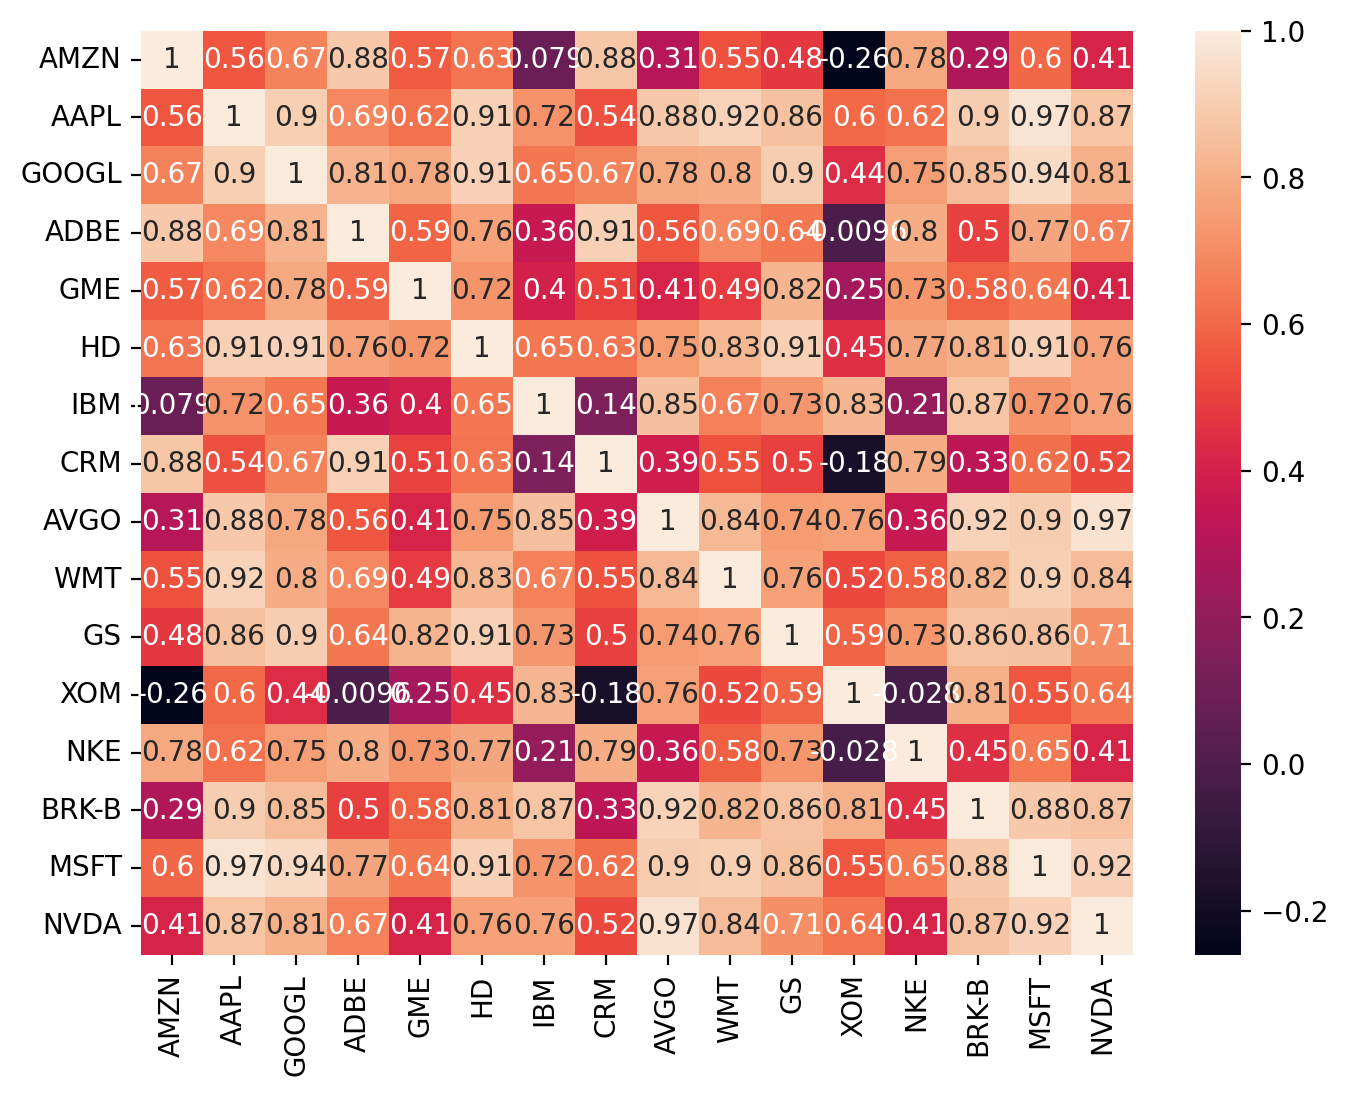

In [ ]:
#Heatmap of correlation between stocks
figure(figsize=(8, 6), dpi=200)
sn.heatmap(corr_matrix, annot = True)

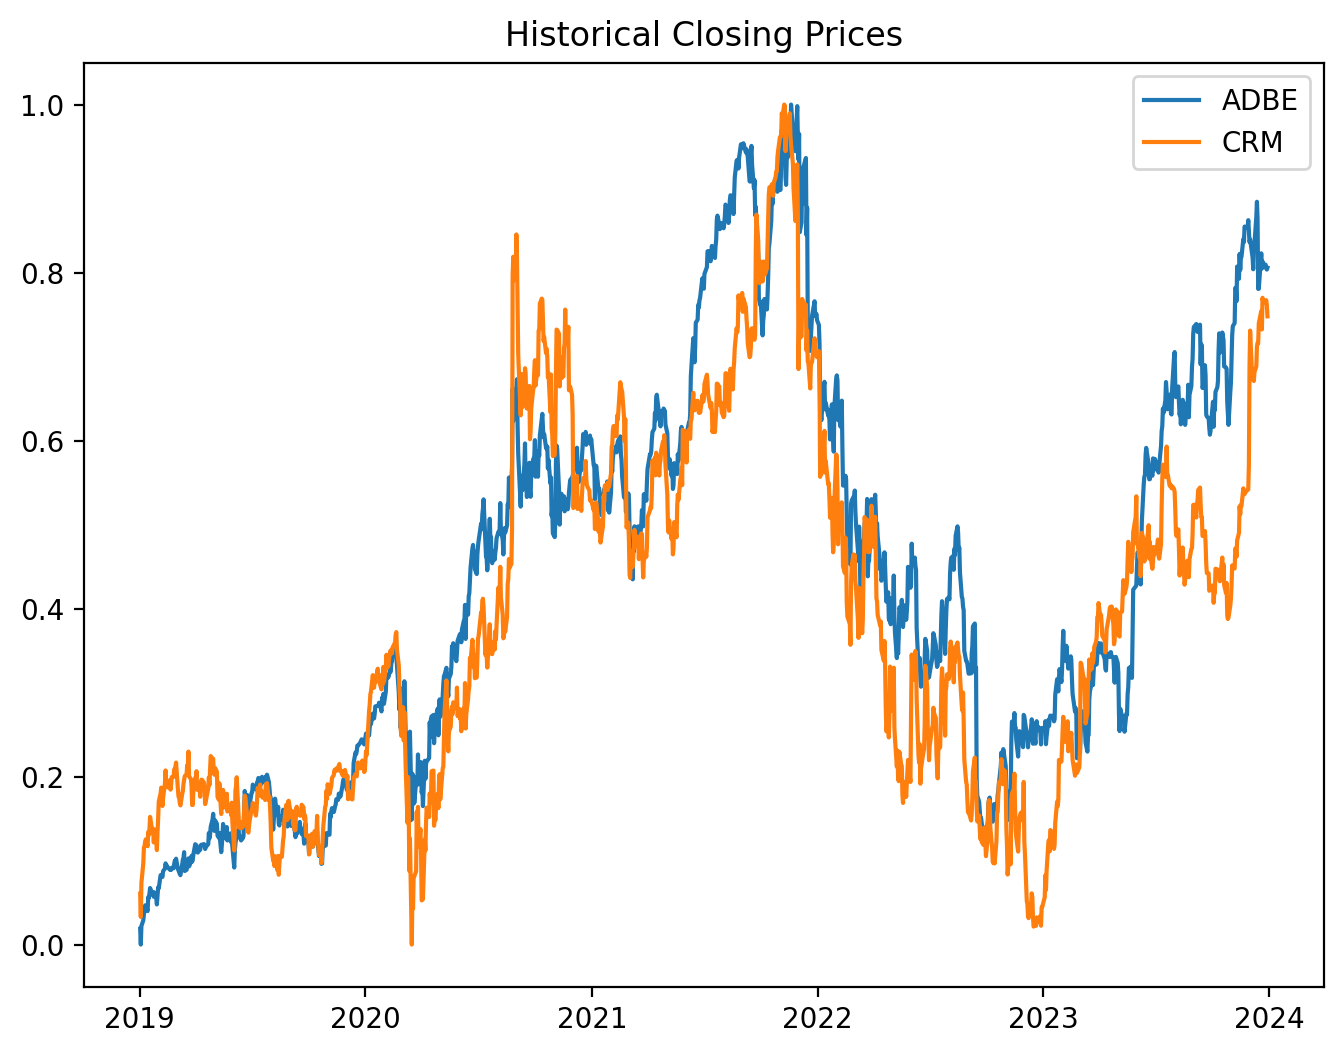

In [ ]:
#Graph of historical closing prices
figure(figsize=(8, 6), dpi=200)
ADBE = (d['ADBE']-d['ADBE'].min())/(d['ADBE'].max()-d['ADBE'].min())
CRM = (d['CRM']-d['CRM'].min())/(d['CRM'].max()-d['CRM'].min())
plt.plot(ADBE, label = "ADBE")
plt.plot(CRM, label = "CRM")
plt.title('Historical Closing Prices')
plt.legend()

By looking at historical closing prices graph. The two stocks move together which is great for pair trading

Text(0.5, 1.0, 'Spread between ADBE and CRM')

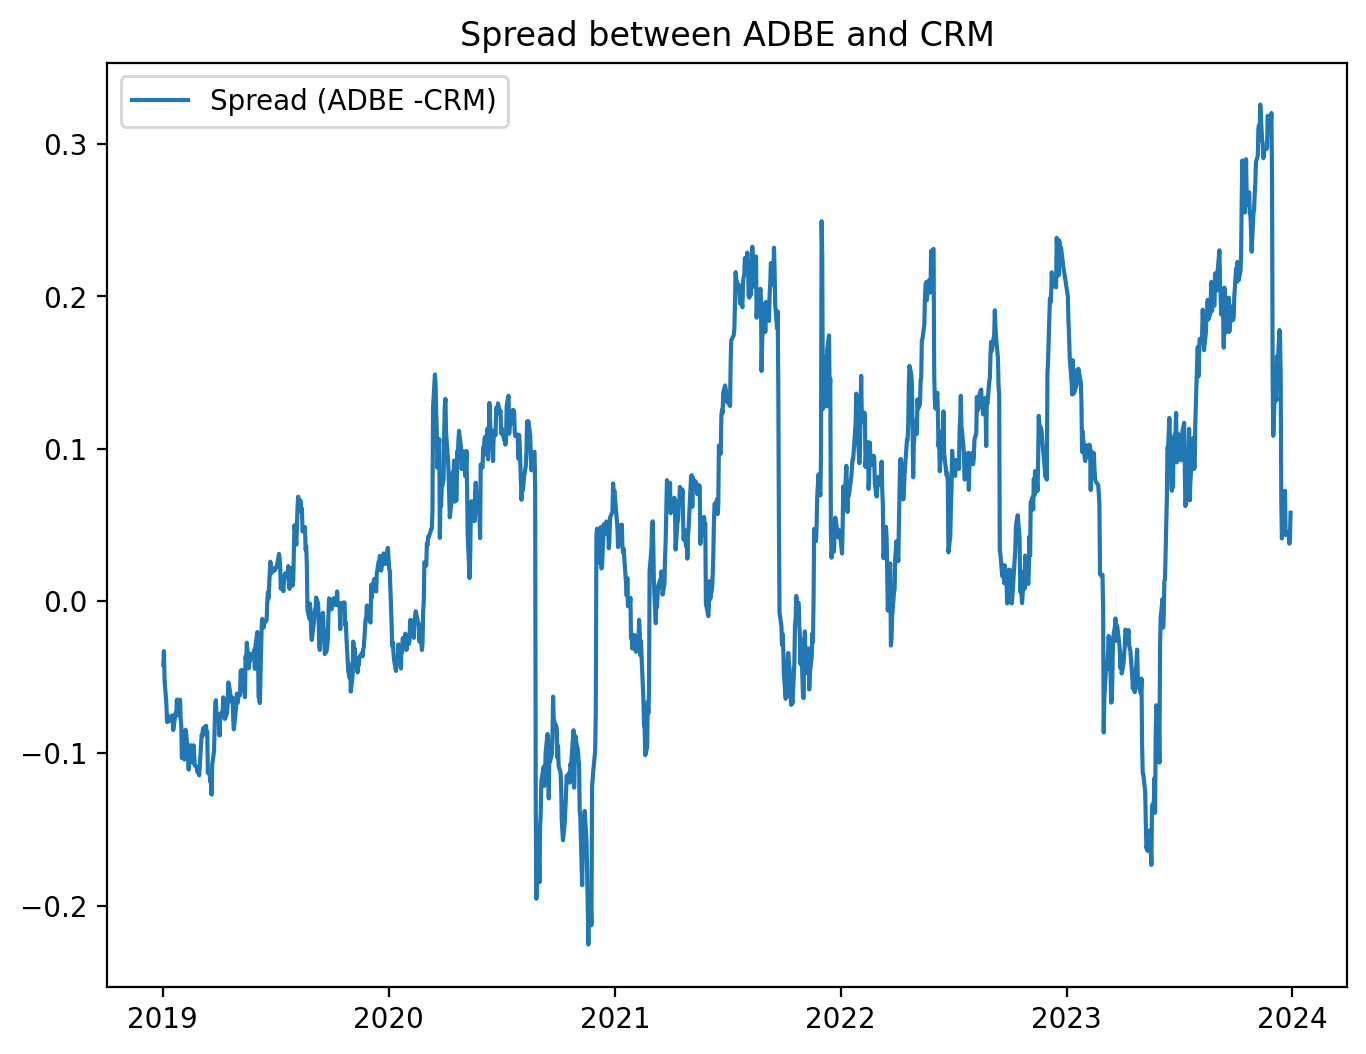

In [ ]:
figure(figsize=(8,6), dpi=200)
plt.plot(ADBE - CRM, label = 'Spread (ADBE -CRM)')
plt.legend()
plt.title("Spread between ADBE and CRM")

By looking at normalized spread, we can see that the spread is mean-reverting

In [ ]:
coint_result = ts.coint(ADBE, CRM)
p_val = coint_result[1]
print('P value for the cointegration test is', p_val)

P value for the cointegration test is 0.011557966978941887


In [ ]:
Spread_ADF = adfuller(ADBE-CRM)
print('P value for the Augmented Dickey-Fuller Test is', Spread_ADF[1])

P value for the Augmented Dickey-Fuller Test is 0.0024648380167960828


Since cointegration test p value and Augmented Dickey-Fuller test p value is less than 0.05, we can infer that the spread is mean-reverting and the two stocks are ideal for pair trading

#Choosing ADBE And CRM for pair trading

In [ ]:
tickers = ['ADBE','CRM']
data = yf.download(tickers, start='2019-01-01', end='2023-12-31')['Close']
data.dropna(inplace=True)

[*********************100%***********************]  2 of 2 completed


#Generate trading signals based on z-score thresholds

In [ ]:
ratio = data['ADBE'] / data['CRM']
zscore = (ratio - ratio.mean()) / ratio.std()

#Thresholds
entry_threshold_long = -0.5
entry_threshold_short = 1.5
exit_threshold = 0.5

# Trading signals
long_signal = zscore < entry_threshold_long
short_signal = zscore > entry_threshold_short
exit_signal = abs(zscore) < exit_threshold

# Position tracking
positions = pd.DataFrame(index=ratio.index, columns=['ADBE', 'CRM'])
positions.loc[long_signal, 'ADBE'] = 1
positions.loc[long_signal, 'CRM'] = -1
positions.loc[short_signal, 'ADBE'] = -1
positions.loc[short_signal, 'CRM'] = 1
positions.loc[exit_signal] = 0
positions.fillna(method='ffill', inplace=True)

<ipython-input-11-4c4500db5afe>:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  positions.fillna(method='ffill', inplace=True)
<ipython-input-11-4c4500db5afe>:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  positions.fillna(method='ffill', inplace=True)


#Calculating Performance Metrics

In [ ]:
# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Strategy returns
strategy_returns = (positions.shift(1) * daily_returns).sum(axis=1)

# Performance metrics
cumulative_returns = (1 + strategy_returns).cumprod()
rolling_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - rolling_max) / rolling_max
max_drawdown = drawdown.min()

# Annual Sharpe Ratios and Returns
annual_sharpe_ratios = {}
annual_returns = {}

for year in range(2019, 2024):
    yearly_returns = strategy_returns[strategy_returns.index.year == year]
    if not yearly_returns.empty:
        cumulative_return = (1 + yearly_returns).prod() - 1
        sharpe = (yearly_returns.mean() / yearly_returns.std()) * np.sqrt(252)

        annual_sharpe_ratios[year] = sharpe
        annual_returns[year] = cumulative_return

for year in annual_sharpe_ratios:
    print(f"Year {year} - Sharpe Ratio: {annual_sharpe_ratios[year]:.4f} | Return: {annual_returns[year]*100:.2f}%")

print(f"\nMax Drawdown: {max_drawdown:.2%}")
print(f"Total Cumulative Return: {(cumulative_returns[-1] - 1) * 100:.2f}%")

Year 2019 - Sharpe Ratio: 1.3152 | Return: 26.26%
Year 2020 - Sharpe Ratio: 0.6953 | Return: 11.76%
Year 2021 - Sharpe Ratio: 2.1180 | Return: 42.75%
Year 2022 - Sharpe Ratio: 1.2347 | Return: 21.05%
Year 2023 - Sharpe Ratio: 1.0614 | Return: 27.77%

Max Drawdown: -17.03%
Total Cumulative Return: 211.54%


<ipython-input-12-2f9ea7610a00>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Total Cumulative Return: {(cumulative_returns[-1] - 1) * 100:.2f}%")


#Overall sharpe ratio and average annualized returns

In [ ]:
# Total cumulative return over 5 years
total_cumulative_return = (1 + strategy_returns).prod() - 1

# Average annualized return
avg_annualized_return = (1 + total_cumulative_return) ** (1 / 5) - 1

annualized_std = strategy_returns.std() * np.sqrt(252)

# Overall Sharpe ratio
overall_sharpe = avg_annualized_return / annualized_std

print(f"Overall 5-Year Sharpe Ratio: {overall_sharpe:.4f}")
print(f"Average Annualized Return: {avg_annualized_return*100:.2f}%")

Overall 5-Year Sharpe Ratio: 1.2816
Average Annualized Return: 25.52%


#Plotting

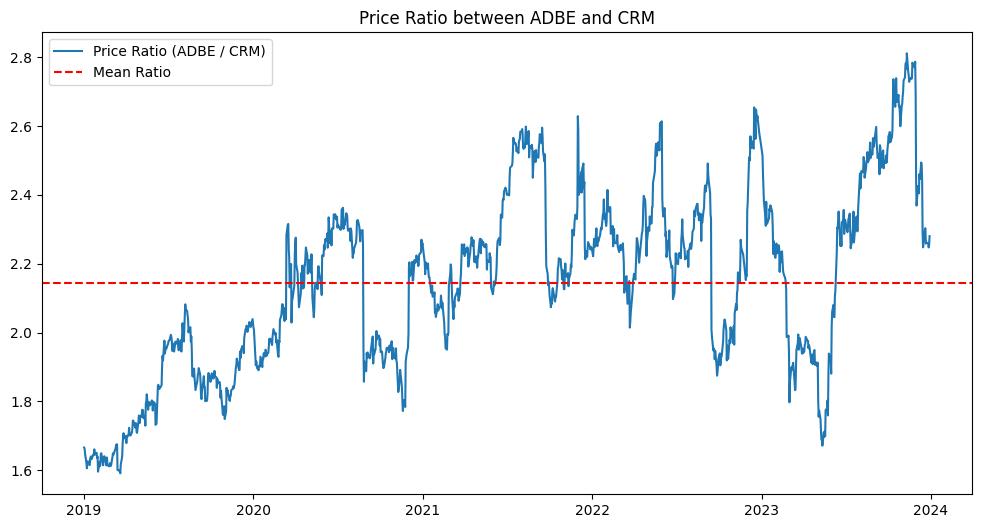

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(ratio, label='Price Ratio (ADBE / CRM)')
plt.axhline(ratio.mean(), color='red', linestyle='--', label='Mean Ratio')
plt.title("Price Ratio between ADBE and CRM")
plt.legend()
plt.show()

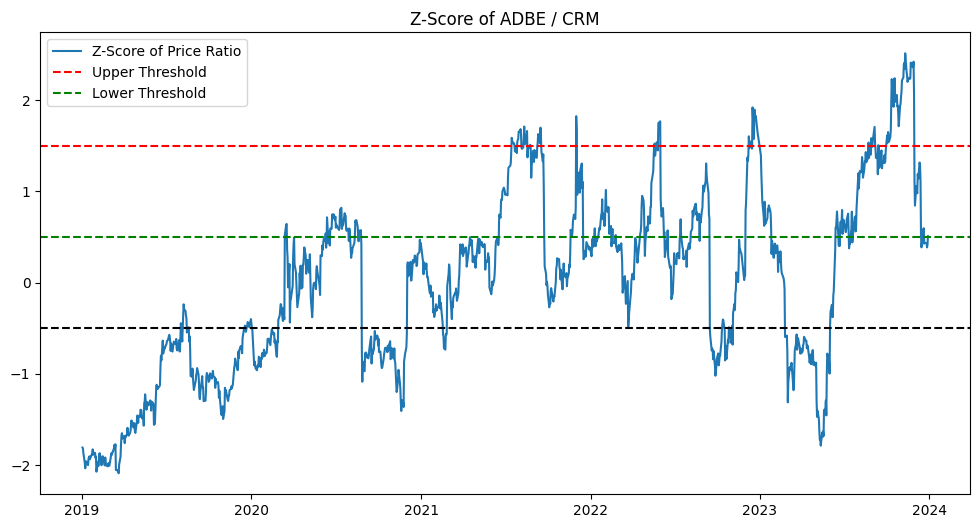

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(zscore, label='Z-Score of Price Ratio')
plt.axhline(1.5, color='red', linestyle='--', label='Upper Threshold')
plt.axhline(0.5, color='green', linestyle='--', label='Lower Threshold')
plt.axhline(-0.5, color='black', linestyle='--')
plt.title("Z-Score of ADBE / CRM")
plt.legend()
plt.show()

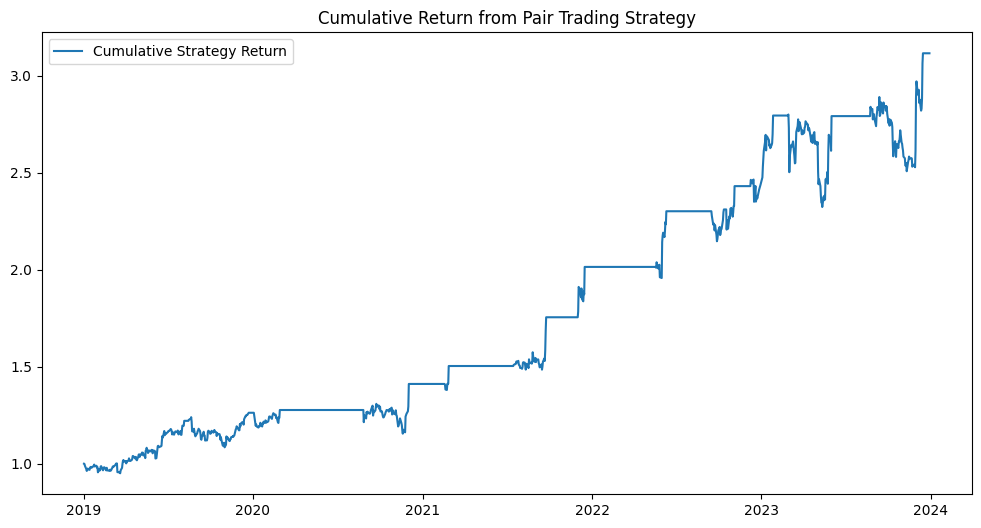

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns, label='Cumulative Strategy Return')
plt.title("Cumulative Return from Pair Trading Strategy")
plt.legend()
plt.show()

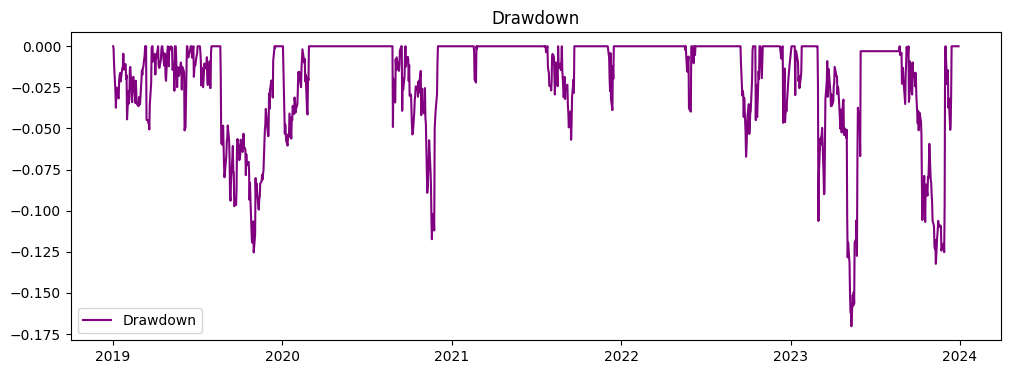

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(drawdown, color='purple', label='Drawdown')
plt.title("Drawdown")
plt.legend()
plt.show()